# Supply Chain Management: Demand Forecasting Project
### Objective: Analyze and forecast demand for a fashion & beauty startup using machine learning and data visualization.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\rishab\Downloads\supply chain\supply_chain_data.csv")

In [3]:
print("Shape of dataset:", data.shape)
print("\nColumn names:\n", data.columns)
print("\nData types:\n", data.dtypes)
print("\nFirst 5 rows:\n", data.head())
print("\nMissing values:\n", data.isnull().sum())

Shape of dataset: (100, 24)

Column names:
 Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

Data types:
 Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             

In [4]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
target = 'number_of_products_sold'

In [6]:
drop_cols = ['sku', 'supplier_name', 'routes', 'inspection_results']
data = data.drop(columns=drop_cols)

In [7]:
categorical_cols = ['product_type', 'customer_demographics', 'shipping_carriers', 
                    'location', 'transportation_modes']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

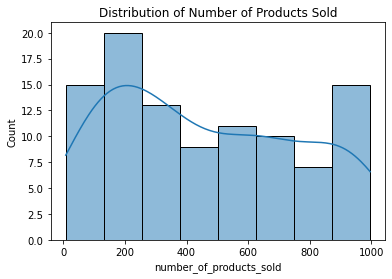

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data[target], kde=True)
plt.title('Distribution of Number of Products Sold')
plt.show()

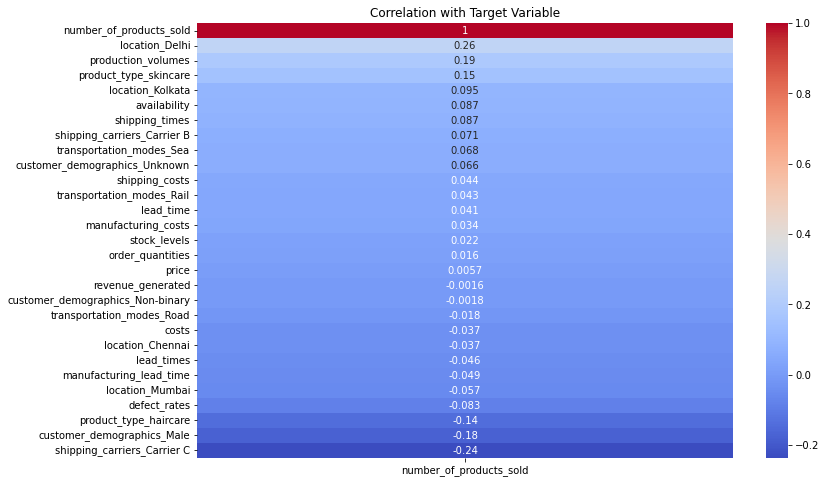

In [10]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
X = data.drop(columns=[target, 'revenue_generated'])  # drop leakage columns
y = data[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 162176.57
R² Score: -0.70


In [20]:
import joblib
joblib.dump(model, 'supply_chain_forecasting_model.pkl')

['supply_chain_forecasting_model.pkl']

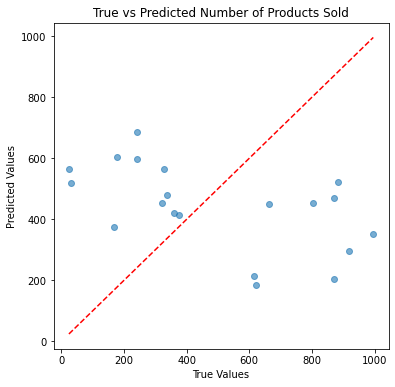

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Number of Products Sold")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()